In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Gall_Bladder_Disorders_AI - sheet-1.csv')
df2=pd.read_csv('/content/drive/MyDrive/Test_data_version1.xlsx - Sheet1.csv')


df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [3]:
df

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08
...,...,...,...,...
2145,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08
2146,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04
2147,KHYUNQGPTTL11,2.304190e+05,1.034231e+09,0.000000e+00
2148,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04


In [4]:
df2

,Patient_ID,Diabetes,High Blood pressure,Coronary Artery Disease,Arrhythmia,"Heart Failure- Dilated Cardiomyopathy, Restrictive Cardiomyopathy",Cholesterol disorders,Hypertriglyceridemia,"Thyroid Disorders- Hypothyroidism, Hyperthyroidism","Anemia- Microcytic, Hemolytic",...,Fatigue,"Mood Disorders- Anxiety, Schizophrenia, Depression",Urticaria,Essential tremors,Renal Disorders,"Sinusitis, Dust Allergy (Ciliary dykinesia, Hyper IgE syndrome, Angioedma, Chroinc granulomatous)",Obesity,Skin Health,Eye Health,Gastritis
0,KHAIGHGPPGX19,Moderate to High,Mild,-,-,-,Mild,Moderate,0,0,...,-,0,-,-,-,-,Mild,-,-,Mild
1,KHAIGHGPPGX22,Mild,Moderate,Mild,-,-,Moderate,Mild,Mild,0,...,-,0,-,-,-,-,Mild,-,-,Mild
2,KHAIGHGPTTL318,Mild to Moderate,Mild,Mild,-,-,Mild,Mild,Low to Mild,0,...,-,0,-,-,-,-,Low to Mild,-,-,Moderate
3,KHAIGHGPTTL319,Mild to Moderate,Mild to Moderate,Mild,-,-,Moderate,Moderate,Low to Mild,0,...,-,0,-,-,-,-,Moderate,-,-,Moderate
4,KHAIGHGPTTL321,Moderate to High,Mild,Mild,-,-,Mild to Moderate,Mild to Moderate,Low to Mild,0,...,-,0,-,-,-,-,Mild to Moderate,-,-,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,KHAIGHGPTTL546,Mild,Mild,Mild,-,-,Mild,Moderate,0,0,...,-,Moderate,-,-,-,-,0,-,Mild,-
496,KHAIGHGPTTL548,Low,Moderate to High,Mild,-,-,Moderate,Mild,0,0,...,-,Moderate,-,-,-,-,Moderate,-,-,0
497,KHAIGHGPTTL551,Moderate,Mild,Mild,-,-,Moderate,Moderate,Mild,0,...,-,Moderate,-,-,-,-,Mild,-,-,Moderate
498,KHAIGHGPTTL553,Mild,Mild,Mild,-,-,Mild,Mild,Low,0,...,-,Moderate,-,-,-,-,Mild,-,-,Low to Mild


In [5]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [6]:
labels=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set2.csv')

In [7]:
labels

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08,0,2
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08,0,0
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08,0,0
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08,0,0
...,...,...,...,...,...,...
2145,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1
2146,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04,0,0
2147,KHYUNQGPTTL11,2.304190e+05,1.034231e+09,0.000000e+00,0,0
2148,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [8]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [9]:
df_train

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08,0,2
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08,0,0
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08,0,0
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08,0,0
...,...,...,...,...,...,...
1678,KHTENTGPTTL14,3.645107e+08,1.124426e+09,6.560451e+08,0,0
1679,KHTENTGPTTL16,5.770269e+08,1.549481e+09,3.643495e+08,0,0
1680,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04,0,0
1681,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [10]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


# LIGHTGBM

In [11]:
df_train_set2=df_train.copy()
df_train_set2=df_train_set2.drop(columns=['Patient_ID','Gall bladder disorders'])

In [12]:
scaler=StandardScaler()
smote=SMOTE()
test_split=0.2

In [13]:
X = df_train_set2.drop(columns=['new_labels'])
y = df_train_set2['new_labels']
X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [14]:
x_train_valid=df_train_set2.drop(columns=['new_labels'])
y_train_valid=df_train_set2['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [15]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [16]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1


In [17]:
df_test.head(60)


,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0
5,KHAIGHGPTTL352,3.646952e+08,1.548649e+09,6.425613e+05,-,0
6,KHAIGHGPTTL354,3.830000e+08,1.549581e+09,2.126082e+08,-,0
7,KHAIGHGPTTL355,9.220119e+04,6.680700e+08,6.146746e+04,-,0
8,KHAIGHGPTTL356,1.823015e+08,1.277008e+09,1.822861e+08,-,0
9,KHAIGHGPTTL359,1.825318e+08,7.290060e+08,2.125852e+08,-,0


In [18]:
df_test=df_test.drop(columns=['Patient_ID','Gall bladder disorders'])

In [19]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


In [20]:
y_test.value_counts()

,count
new_labels,
2,238
0,238
1,238


In [21]:
X_test.value_counts()


GALL_BLADDER_DISORDERS  CHOLESTEROL_DISORDERS  OBESITY     
3.645569e+08            1.519075e+09           6.258690e+08    2
7.401154e+08            2.661400e+09           3.645997e+08    1
7.328629e+08            9.391484e+08           4.091452e+08    1
7.331073e+08            1.967992e+09           1.867810e+08    1
7.334193e+08            1.832570e+09           6.276975e+08    1
                                                              ..
5.465358e+08            2.425927e+09           4.252704e+08    1
5.465359e+08            1.276885e+09           2.009980e+08    1
                        1.367226e+09           1.825318e+08    1
                        1.488668e+09           3.950018e+08    1
1.305496e+09            2.369129e+09           5.771343e+08    1
Name: count, Length: 713, dtype: int64

/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 765
[LightGBM] [Info] Number of data points in the train set: 2853, number of used features: 3
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

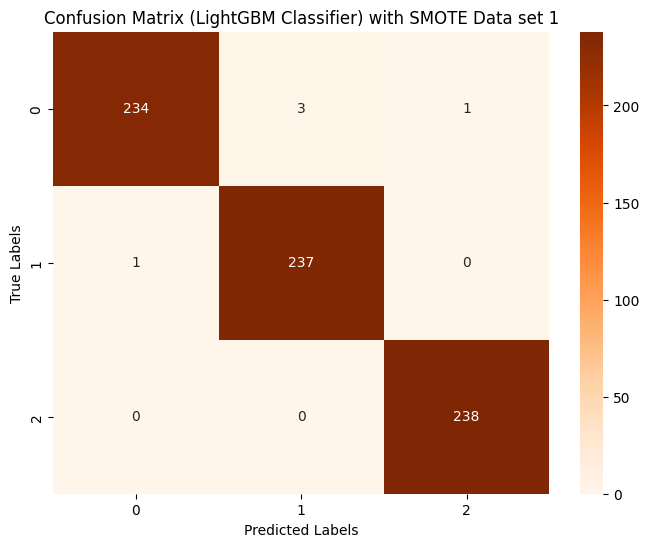

In [22]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# LightGBM Classifier
lgbm_classifier = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.2,
    max_depth=7,
    random_state=42
)

# Train the classifier
lgbm_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_lgbm = lgbm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_lgbm = precision_score(y_test, y_pred_lgbm, average='weighted')
recall_lgbm = recall_score(y_test, y_pred_lgbm, average='weighted')
f1_lgbm = f1_score(y_test, y_pred_lgbm, average='weighted')
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Print the evaluation metrics
print("LightGBM Classifier Metrics:")
print(f"Accuracy: {accuracy_lgbm}")
print(f"Precision: {precision_lgbm}")
print(f"Recall: {recall_lgbm}")
print(f"F1-score: {f1_lgbm}")
print(f"Confusion Matrix:\n{conf_matrix_lgbm}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (LightGBM Classifier) with SMOTE Data set 1")
plt.show()


Accuracy (LightGBM): 0.9976232917409388
Precision (LightGBM): 0.9976423867048868
Recall (LightGBM): 0.9976232917409388
F1-score (LightGBM): 0.9976260824592068
Confusion Matrix (LightGBM):
[[1185    3    1]
 [   0  367    0]
 [   0    0  127]]


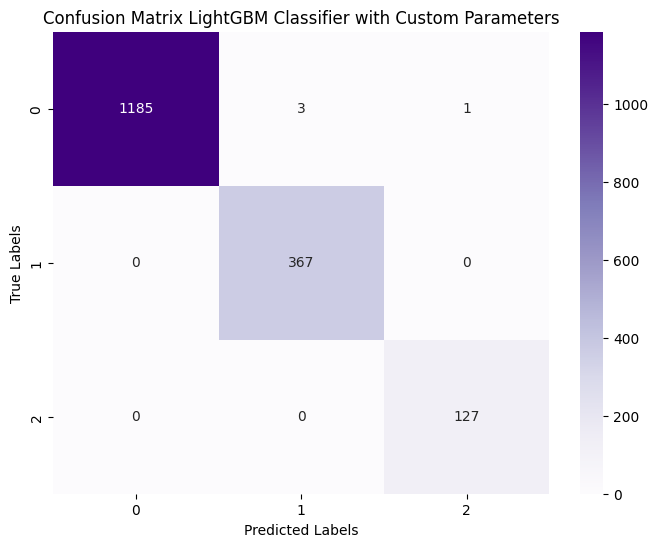

In [23]:
# from lightgbm import LGBMClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize LightGBM Classifier with specific parameters
# lgbm_classifier = LGBMClassifier(
#     n_estimators=200,     # Number of trees
#     learning_rate=0.2,    # Learning rate
#     max_depth=7,          # Maximum depth of trees
#     random_state=42       # Ensures reproducibility
# )

# # Fit the model on training data
# lgbm_classifier.fit(x_train_valid_scaled, y_train_valid)

# # Predict on training data
y_pred_train_lgbm = lgbm_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_lgbm = accuracy_score(y_train_valid, y_pred_train_lgbm)
precision_lgbm = precision_score(y_train_valid, y_pred_train_lgbm, average='weighted')  # Use 'weighted' for multi-class
recall_lgbm = recall_score(y_train_valid, y_pred_train_lgbm, average='weighted')
f1_lgbm = f1_score(y_train_valid, y_pred_train_lgbm, average='weighted')
conf_matrix_lgbm = confusion_matrix(y_train_valid, y_pred_train_lgbm)

# Print metrics
print(f"Accuracy (LightGBM): {accuracy_lgbm}")
print(f"Precision (LightGBM): {precision_lgbm}")
print(f"Recall (LightGBM): {recall_lgbm}")
print(f"F1-score (LightGBM): {f1_lgbm}")
print(f"Confusion Matrix (LightGBM):\n{conf_matrix_lgbm}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix LightGBM Classifier with Custom Parameters")
plt.show()


Accuracy (LightGBM Test): 0.961456102783726
Precision (LightGBM Test): 0.9612367995119258
Recall (LightGBM Test): 0.961456102783726
F1-score (LightGBM Test): 0.9609902340806988
Confusion Matrix (LightGBM Test):
[[316   3   0]
 [ 10 102   1]
 [  1   3  31]]


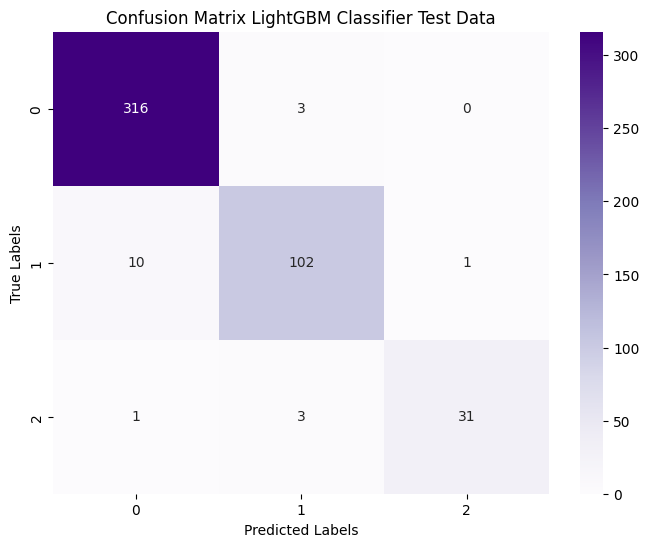

In [24]:
# from lightgbm import LGBMClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize LightGBM Classifier with specified parameters
# lgbm_classifier = LGBMClassifier(
#     n_estimators=200,     # Number of boosting rounds
#     learning_rate=0.2,    # Learning rate
#     max_depth=7,          # Maximum depth of trees
#     random_state=42       # Ensures reproducibility
# )

# # Fit the model on training data
# lgbm_classifier.fit(x_train_valid_scaled, y_train_valid)

# Predict on test data
y_pred_test_lgbm = lgbm_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_lgbm_test = accuracy_score(y_test_valid, y_pred_test_lgbm)
precision_lgbm_test = precision_score(y_test_valid, y_pred_test_lgbm, average='weighted')  # Use 'weighted' for multi-class
recall_lgbm_test = recall_score(y_test_valid, y_pred_test_lgbm, average='weighted')
f1_lgbm_test = f1_score(y_test_valid, y_pred_test_lgbm, average='weighted')
conf_matrix_lgbm_test = confusion_matrix(y_test_valid, y_pred_test_lgbm)

# Print metrics
print(f"Accuracy (LightGBM Test): {accuracy_lgbm_test}")
print(f"Precision (LightGBM Test): {precision_lgbm_test}")
print(f"Recall (LightGBM Test): {recall_lgbm_test}")
print(f"F1-score (LightGBM Test): {f1_lgbm_test}")
print(f"Confusion Matrix (LightGBM Test):\n{conf_matrix_lgbm_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lgbm_test, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix LightGBM Classifier Test Data")
plt.show()


In [25]:
y_pred_test_lgbm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [26]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [27]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [28]:
# Merge df2 with total_test_org based on 'Patient_ID'
merged_df = df_test.merge(df2[['Patient_ID', 'Gall bladder disorders']], on='Patient_ID', how='left')
# Changed 'patient_id' to 'Patient_ID' to match the column name in df2 and total_test_org

# 'merged_df' now contains all columns from total_test_org and an additional 'GALL_BLADDER_DISORDERS' column

In [29]:
merged_df

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0
...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0


In [30]:
labels=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set2.csv')

In [31]:
# Select the required columns from the labels dataset
new_labels_df = labels[['Patient_ID', 'new_labels']]

# Merge the new_labels column with merge_df on patient_id
final_merged_df = merged_df.merge(new_labels_df, on='Patient_ID', how='inner')

# Display the first few rows of the final merged DataFrame
print(final_merged_df.head())


       Patient_ID  GALL_BLADDER_DISORDERS  CHOLESTEROL_DISORDERS  \
0  KHAIGHGPTTL318             182439716.4           1.094998e+09   
1  KHAIGHGPTTL319             910770303.8           1.731660e+09   
2  KHAIGHGPTTL321             364464779.5           1.732531e+09   
3  KHAIGHGPTTL348             364372662.3           1.123409e+09   
4  KHAIGHGPTTL350             577026940.4           1.366654e+09   

        OBESITY Gall bladder disorders  new_labels  
0  1.824242e+08                      0           0  
1  2.305030e+05                      0           0  
2  4.723112e+08            Low to Mild           0  
3  4.436289e+08                      -           0  
4  5.916564e+07                      0           0  


In [32]:
merged_df

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0
...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0


In [33]:
import pandas as pd

# Convert the array into a DataFrame
y_pred_test_lgbm_df = pd.DataFrame({
    'predicted_labels_lgbm': y_pred_test_lgbm  # Array of predictions
})

# Reset the index of both DataFrames to align the rows
final_merged_df = final_merged_df.reset_index(drop=True)
y_pred_test_lgbm_df = y_pred_test_lgbm_df.reset_index(drop=True)

# Concatenate the DataFrame with the predictions
final_merged_LightGBM_set2= pd.concat([final_merged_df, y_pred_test_lgbm_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_LightGBM_set2.head())


       Patient_ID  GALL_BLADDER_DISORDERS  CHOLESTEROL_DISORDERS  \
0  KHAIGHGPTTL318             182439716.4           1.094998e+09   
1  KHAIGHGPTTL319             910770303.8           1.731660e+09   
2  KHAIGHGPTTL321             364464779.5           1.732531e+09   
3  KHAIGHGPTTL348             364372662.3           1.123409e+09   
4  KHAIGHGPTTL350             577026940.4           1.366654e+09   

        OBESITY Gall bladder disorders  new_labels  predicted_labels_lgbm  
0  1.824242e+08                      0           0                      0  
1  2.305030e+05                      0           0                      0  
2  4.723112e+08            Low to Mild           0                      0  
3  4.436289e+08                      -           0                      0  
4  5.916564e+07                      0           0                      0  


In [34]:
final_merged_LightGBM_set2

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,predicted_labels_lgbm
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [35]:
final_merged_LightGBM_set2.to_csv('/content/drive/MyDrive/GALL BLADDERS/final_merged_LightGBM_set2.csv', index=False)


# Gradient Boosting

In [36]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [37]:
labels=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set2.csv')

In [38]:
labels

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08,0,2
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08,0,0
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08,0,0
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08,0,0
...,...,...,...,...,...,...
2145,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1
2146,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04,0,0
2147,KHYUNQGPTTL11,2.304190e+05,1.034231e+09,0.000000e+00,0,0
2148,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [39]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [40]:
df_train

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08,0,2
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08,0,0
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08,0,0
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08,0,0
...,...,...,...,...,...,...
1678,KHTENTGPTTL14,3.645107e+08,1.124426e+09,6.560451e+08,0,0
1679,KHTENTGPTTL16,5.770269e+08,1.549481e+09,3.643495e+08,0,0
1680,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04,0,0
1681,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [41]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [42]:
df_train_set2=df_train.copy()
df_train_set2=df_train_set2.drop(columns=['Patient_ID','Gall bladder disorders'])

In [43]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.2

In [44]:
X = df_train_set2.drop(columns=['new_labels'])
y = df_train_set2['new_labels']
X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [45]:
x_train_valid=df_train_set2.drop(columns=['new_labels'])
y_train_valid=df_train_set2['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [46]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [47]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [48]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1


In [49]:
df_test=df_test.drop(columns=['Patient_ID','Gall bladder disorders'])

In [50]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


In [51]:
y_test.value_counts()

,count
new_labels,
2,238
0,238
1,238


Gradient Boosting Classifier Metrics:
Accuracy: 0.9957983193277311
Precision: 0.995850622406639
Recall: 0.9957983193277311
F1-score: 0.9957981524229037
Confusion Matrix:
[[235   3   0]
 [  0 238   0]
 [  0   0 238]]


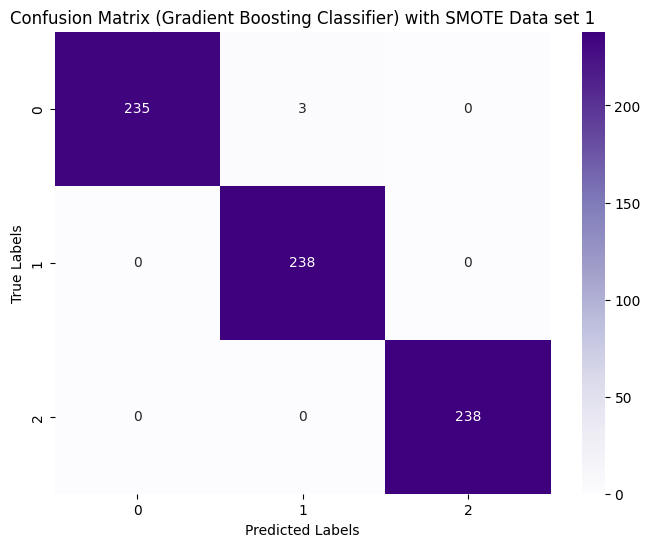

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=7,
    random_state=42
)

# Train the classifier
gb_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_gb = gb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

# Print the evaluation metrics
print("Gradient Boosting Classifier Metrics:")
print(f"Accuracy: {accuracy_gb}")
print(f"Precision: {precision_gb}")
print(f"Recall: {recall_gb}")
print(f"F1-score: {f1_gb}")
print(f"Confusion Matrix:\n{conf_matrix_gb}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Purples",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Gradient Boosting Classifier) with SMOTE Data set 1")
plt.show()


Accuracy (Gradient Boosting): 0.9982174688057041
Precision (Gradient Boosting): 0.9982319217613336
Recall (Gradient Boosting): 0.9982174688057041
F1-score (Gradient Boosting): 0.9982199709433285
Confusion Matrix (Gradient Boosting):
[[1186    3    0]
 [   0  367    0]
 [   0    0  127]]


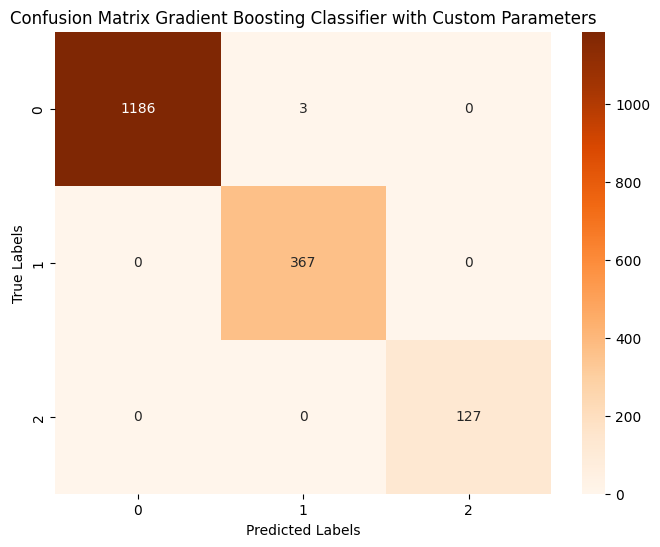

In [53]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize Gradient Boosting Classifier with specific parameters
# gb_classifier = GradientBoostingClassifier(
#     n_estimators=50,     # Number of boosting stages
#     learning_rate=0.2,   # Learning rate
#     max_depth=7,         # Maximum depth of individual trees
#     random_state=42      # Ensures reproducibility
# )

# # Fit the model on training data
# gb_classifier.fit(x_train_valid_scaled, y_train_valid)

# Predict on training data
y_pred_train_gb = gb_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_gb = accuracy_score(y_train_valid, y_pred_train_gb)
precision_gb = precision_score(y_train_valid, y_pred_train_gb, average='weighted')  # Use 'weighted' for multi-class
recall_gb = recall_score(y_train_valid, y_pred_train_gb, average='weighted')
f1_gb = f1_score(y_train_valid, y_pred_train_gb, average='weighted')
conf_matrix_gb = confusion_matrix(y_train_valid, y_pred_train_gb)

# Print metrics
print(f"Accuracy (Gradient Boosting): {accuracy_gb}")
print(f"Precision (Gradient Boosting): {precision_gb}")
print(f"Recall (Gradient Boosting): {recall_gb}")
print(f"F1-score (Gradient Boosting): {f1_gb}")
print(f"Confusion Matrix (Gradient Boosting):\n{conf_matrix_gb}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Oranges",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Gradient Boosting Classifier with Custom Parameters")
plt.show()


Accuracy (Gradient Boosting Test): 0.9593147751605996
Precision (Gradient Boosting Test): 0.9594563024764908
Recall (Gradient Boosting Test): 0.9593147751605996
F1-score (Gradient Boosting Test): 0.9585035602143026
Confusion Matrix (Gradient Boosting Test):
[[318   1   0]
 [ 13  99   1]
 [  1   3  31]]


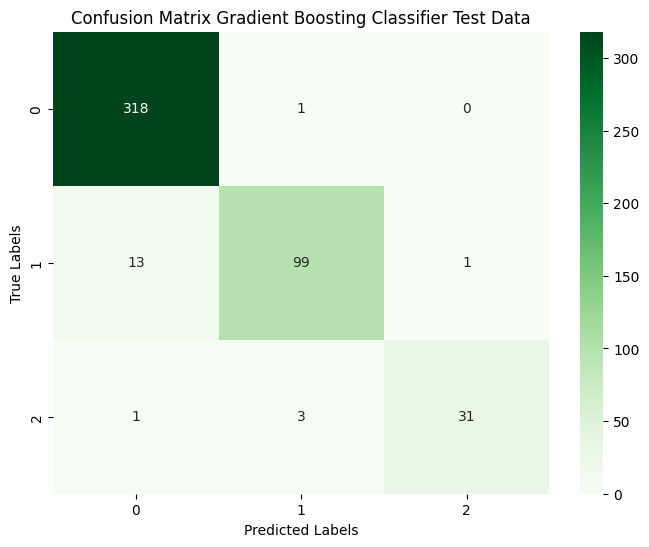

In [54]:
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize Gradient Boosting Classifier with specified parameters
# gb_classifier = GradientBoostingClassifier(
#     n_estimators=50,     # Number of boosting stages
#     learning_rate=0.2,   # Learning rate
#     max_depth=7,         # Maximum depth of the individual regression estimators
#     random_state=42      # Ensures reproducibility
# )

# # Fit the model on training data
# gb_classifier.fit(x_train_valid_scaled, y_train_valid)

# Predict on test data
y_pred_test_gb = gb_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_gb_test = accuracy_score(y_test_valid, y_pred_test_gb)
precision_gb_test = precision_score(y_test_valid, y_pred_test_gb, average='weighted')  # Use 'weighted' for multi-class
recall_gb_test = recall_score(y_test_valid, y_pred_test_gb, average='weighted')
f1_gb_test = f1_score(y_test_valid, y_pred_test_gb, average='weighted')
conf_matrix_gb_test = confusion_matrix(y_test_valid, y_pred_test_gb)

# Print metrics
print(f"Accuracy (Gradient Boosting Test): {accuracy_gb_test}")
print(f"Precision (Gradient Boosting Test): {precision_gb_test}")
print(f"Recall (Gradient Boosting Test): {recall_gb_test}")
print(f"F1-score (Gradient Boosting Test): {f1_gb_test}")
print(f"Confusion Matrix (Gradient Boosting Test):\n{conf_matrix_gb_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb_test, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Gradient Boosting Classifier Test Data")
plt.show()


In [55]:
y_pred_test_gb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [56]:
final_merged_GB_set2=final_merged_LightGBM_set2

In [57]:
final_merged_GB_set2


,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,predicted_labels_lgbm
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [58]:
final_merged_GB_set2=final_merged_GB_set2.drop(columns=['predicted_labels_lgbm'])

In [59]:
final_merged_GB_set2

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1


In [60]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_gb_df = pd.DataFrame({
    'y_pred_test_gb': y_pred_test_gb  # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_GB_set2 = final_merged_GB_set2.reset_index(drop=True)
y_pred_test_gb_df=y_pred_test_gb_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_GB_set2 = pd.concat([final_merged_GB_set2, y_pred_test_gb_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_GB_set2.head())


       Patient_ID  GALL_BLADDER_DISORDERS  CHOLESTEROL_DISORDERS  \
0  KHAIGHGPTTL318             182439716.4           1.094998e+09   
1  KHAIGHGPTTL319             910770303.8           1.731660e+09   
2  KHAIGHGPTTL321             364464779.5           1.732531e+09   
3  KHAIGHGPTTL348             364372662.3           1.123409e+09   
4  KHAIGHGPTTL350             577026940.4           1.366654e+09   

        OBESITY Gall bladder disorders  new_labels  y_pred_test_gb  
0  1.824242e+08                      0           0               0  
1  2.305030e+05                      0           0               0  
2  4.723112e+08            Low to Mild           0               0  
3  4.436289e+08                      -           0               0  
4  5.916564e+07                      0           0               0  


In [61]:
final_merged_GB_set2.head(60)

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,y_pred_test_gb
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
5,KHAIGHGPTTL352,3.646952e+08,1.548649e+09,6.425613e+05,-,0,0
6,KHAIGHGPTTL354,3.830000e+08,1.549581e+09,2.126082e+08,-,0,0
7,KHAIGHGPTTL355,9.220119e+04,6.680700e+08,6.146746e+04,-,0,0
8,KHAIGHGPTTL356,1.823015e+08,1.277008e+09,1.822861e+08,-,0,0
9,KHAIGHGPTTL359,1.825318e+08,7.290060e+08,2.125852e+08,-,0,0


In [62]:
final_merged_GB_set2.to_csv('/content/drive/MyDrive/GALL BLADDERS/final_merged_GB_set2.csv', index=False)


# XG BOOST

In [63]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [64]:
labels=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set2.csv')

In [65]:
labels

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08,0,2
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08,0,0
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08,0,0
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08,0,0
...,...,...,...,...,...,...
2145,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1
2146,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04,0,0
2147,KHYUNQGPTTL11,2.304190e+05,1.034231e+09,0.000000e+00,0,0
2148,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [66]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [67]:
df_train

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08,0,2
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08,0,0
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08,0,0
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08,0,0
...,...,...,...,...,...,...
1678,KHTENTGPTTL14,3.645107e+08,1.124426e+09,6.560451e+08,0,0
1679,KHTENTGPTTL16,5.770269e+08,1.549481e+09,3.643495e+08,0,0
1680,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04,0,0
1681,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [68]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [69]:
df_train_set2=df_train.copy()
df_train_set2=df_train_set2.drop(columns=['Patient_ID','Gall bladder disorders'])

In [70]:
scaler=StandardScaler()
smote=SMOTE()
test_split=0.2

In [71]:
X = df_train_set2.drop(columns=['new_labels'])
y = df_train_set2['new_labels']
X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [72]:
x_train_valid=df_train_set2.drop(columns=['new_labels'])
y_train_valid=df_train_set2['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [73]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [74]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [75]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1


In [76]:
df_test=df_test.drop(columns=['Patient_ID','Gall bladder disorders'])

In [77]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


In [78]:
y_test.value_counts()

,count
new_labels,
2,238
0,238
1,238


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:52:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Classifier Metrics:
Accuracy: 0.9915966386554622
Precision: 0.9917005182798712
Recall: 0.9915966386554622
F1-score: 0.9916139240506329
Confusion Matrix:
[[235   3   0]
 [  1 237   0]
 [  0   2 236]]


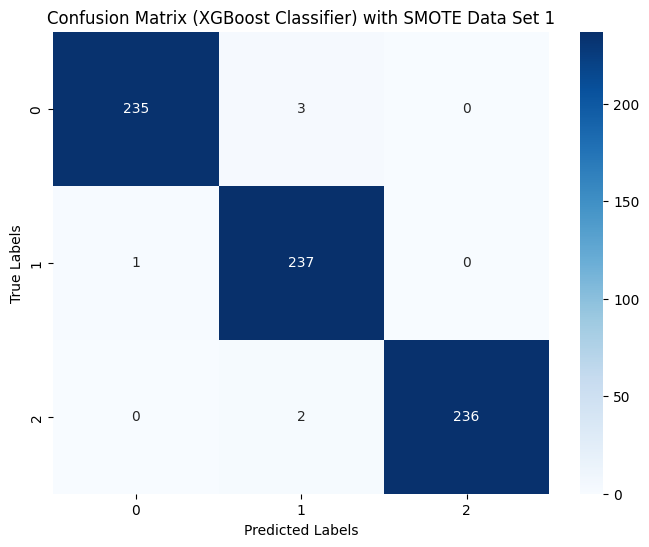

In [79]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Initialize XGBoost Classifier with specified parameters
xgb_classifier = XGBClassifier(
    n_estimators=50,
    learning_rate=0.2,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,  # Suppress label encoding warning (for newer versions of XGBoost)
    eval_metric='logloss'    # Specify the evaluation metric explicitly
)

# Train the classifier
xgb_classifier.fit(X_train_scaled, y_train)

# Predict
y_pred_xgb = xgb_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

# Print the evaluation metrics
print("XGBoost Classifier Metrics:")
print(f"Accuracy: {accuracy_xgb}")
print(f"Precision: {precision_xgb}")
print(f"Recall: {recall_xgb}")
print(f"F1-score: {f1_xgb}")
print(f"Confusion Matrix:\n{conf_matrix_xgb}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGBoost Classifier) with SMOTE Data Set 1")
plt.show()


Accuracy (XGBoost): 0.995840760546643
Precision (XGBoost): 0.9958628465244254
Recall (XGBoost): 0.995840760546643
F1-score (XGBoost): 0.9958465510457353
Confusion Matrix (XGBoost):
[[1185    4    0]
 [   2  365    0]
 [   0    1  126]]


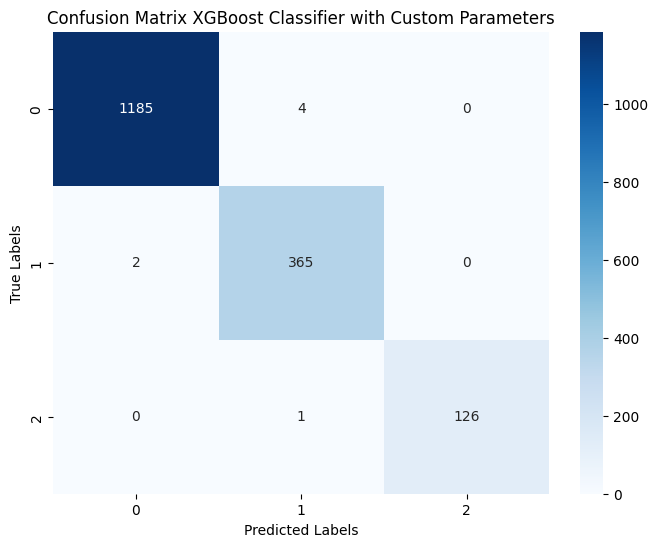

In [80]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize XGBoost Classifier with specific parameters
# xgb_classifier = XGBClassifier(
#     n_estimators=50,      # Number of boosting stages
#     learning_rate=0.2,    # Learning rate
#     max_depth=5,          # Maximum depth of individual trees
#     random_state=42,      # Ensures reproducibility
#     use_label_encoder=False  # Suppress label encoding warning (if applicable)
# )

# # Fit the model on training data
# xgb_classifier.fit(x_train_valid_scaled, y_train_valid)

# Predict on training data
y_pred_train_xgb = xgb_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y_train_valid, y_pred_train_xgb)
precision_xgb = precision_score(y_train_valid, y_pred_train_xgb, average='weighted')  # Use 'weighted' for multi-class
recall_xgb = recall_score(y_train_valid, y_pred_train_xgb, average='weighted')
f1_xgb = f1_score(y_train_valid, y_pred_train_xgb, average='weighted')
conf_matrix_xgb = confusion_matrix(y_train_valid, y_pred_train_xgb)

# Print metrics
print(f"Accuracy (XGBoost): {accuracy_xgb}")
print(f"Precision (XGBoost): {precision_xgb}")
print(f"Recall (XGBoost): {recall_xgb}")
print(f"F1-score (XGBoost): {f1_xgb}")
print(f"Confusion Matrix (XGBoost):\n{conf_matrix_xgb}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix XGBoost Classifier with Custom Parameters")
plt.show()


Accuracy (XGBoost Test): 0.9550321199143469
Precision (XGBoost Test): 0.9548908267190354
Recall (XGBoost Test): 0.9550321199143469
F1-score (XGBoost Test): 0.9544082393752484
Confusion Matrix (XGBoost Test):
[[315   3   1]
 [ 13  99   1]
 [  1   2  32]]


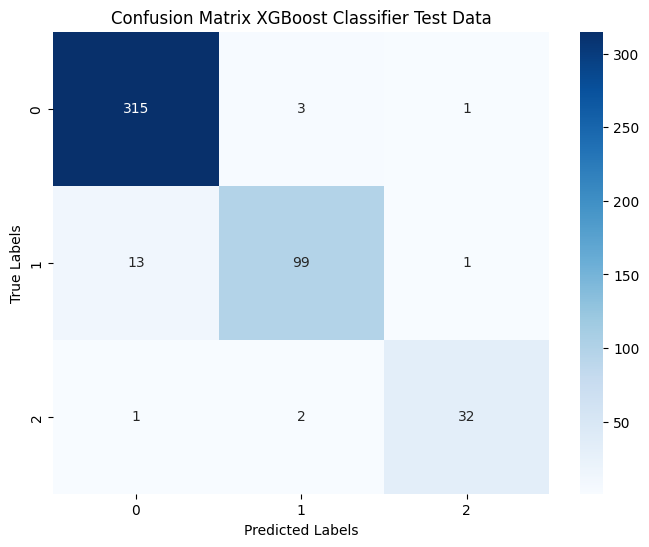

In [81]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize XGBoost Classifier with specific parameters
# xgb_classifier = XGBClassifier(
#     n_estimators=50,      # Number of boosting stages
#     learning_rate=0.2,    # Learning rate
#     max_depth=5,          # Maximum depth of individual trees
#     random_state=42,      # Ensures reproducibility
#     use_label_encoder=False  # Suppress label encoding warning (if applicable)
# )

# # Fit the model on training data
# xgb_classifier.fit(x_train_valid_scaled, y_train_valid)

# Predict on test data
y_pred_test_xgb = xgb_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_xgb_test = accuracy_score(y_test_valid, y_pred_test_xgb)
precision_xgb_test = precision_score(y_test_valid, y_pred_test_xgb, average='weighted')  # Use 'weighted' for multi-class
recall_xgb_test = recall_score(y_test_valid, y_pred_test_xgb, average='weighted')
f1_xgb_test = f1_score(y_test_valid, y_pred_test_xgb, average='weighted')
conf_matrix_xgb_test = confusion_matrix(y_test_valid, y_pred_test_xgb)

# Print metrics
print(f"Accuracy (XGBoost Test): {accuracy_xgb_test}")
print(f"Precision (XGBoost Test): {precision_xgb_test}")
print(f"Recall (XGBoost Test): {recall_xgb_test}")
print(f"F1-score (XGBoost Test): {f1_xgb_test}")
print(f"Confusion Matrix (XGBoost Test):\n{conf_matrix_xgb_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_xgb_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix XGBoost Classifier Test Data")
plt.show()


In [82]:
y_pred_test_xgb

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [83]:
final_merged_XGB_set2=final_merged_LightGBM_set2

In [84]:
final_merged_XGB_set2

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,predicted_labels_lgbm
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [85]:
final_merged_XGB_set2=final_merged_XGB_set2.drop(columns=['predicted_labels_lgbm'])

In [86]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_xgb_df = pd.DataFrame({
    'y_pred_test_xgb': y_pred_test_xgb  # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_XGB_set2_set2 = final_merged_XGB_set2.reset_index(drop=True)
y_pred_test_xgb_df=y_pred_test_xgb_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_XGB_set2 = pd.concat([final_merged_XGB_set2, y_pred_test_xgb_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_XGB_set2.head())


       Patient_ID  GALL_BLADDER_DISORDERS  CHOLESTEROL_DISORDERS  \
0  KHAIGHGPTTL318             182439716.4           1.094998e+09   
1  KHAIGHGPTTL319             910770303.8           1.731660e+09   
2  KHAIGHGPTTL321             364464779.5           1.732531e+09   
3  KHAIGHGPTTL348             364372662.3           1.123409e+09   
4  KHAIGHGPTTL350             577026940.4           1.366654e+09   

        OBESITY Gall bladder disorders  new_labels  y_pred_test_xgb  
0  1.824242e+08                      0           0                0  
1  2.305030e+05                      0           0                0  
2  4.723112e+08            Low to Mild           0                1  
3  4.436289e+08                      -           0                0  
4  5.916564e+07                      0           0                0  


In [87]:
final_merged_XGB_set2.head(60)

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,y_pred_test_xgb
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,1
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
5,KHAIGHGPTTL352,3.646952e+08,1.548649e+09,6.425613e+05,-,0,0
6,KHAIGHGPTTL354,3.830000e+08,1.549581e+09,2.126082e+08,-,0,0
7,KHAIGHGPTTL355,9.220119e+04,6.680700e+08,6.146746e+04,-,0,0
8,KHAIGHGPTTL356,1.823015e+08,1.277008e+09,1.822861e+08,-,0,0
9,KHAIGHGPTTL359,1.825318e+08,7.290060e+08,2.125852e+08,-,0,0


In [88]:
final_merged_XGB_set2.to_csv('/content/drive/MyDrive/GALL BLADDERS/final_merged_XGB_set2.csv', index=False)


# KNN

In [89]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [90]:
labels=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set2.csv')

In [91]:
labels

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08,0,2
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08,0,0
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08,0,0
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08,0,0
...,...,...,...,...,...,...
2145,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1
2146,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04,0,0
2147,KHYUNQGPTTL11,2.304190e+05,1.034231e+09,0.000000e+00,0,0
2148,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [92]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [93]:
df_train

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08,0,2
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08,0,0
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08,0,0
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08,0,0
...,...,...,...,...,...,...
1678,KHTENTGPTTL14,3.645107e+08,1.124426e+09,6.560451e+08,0,0
1679,KHTENTGPTTL16,5.770269e+08,1.549481e+09,3.643495e+08,0,0
1680,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04,0,0
1681,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [94]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [95]:
df_train_set2=df_train.copy()
df_train_set2=df_train_set2.drop(columns=['Patient_ID','Gall bladder disorders'])

In [96]:
scaler=StandardScaler()
smote=SMOTE()
test_split=0.2

In [97]:
X = df_train_set2.drop(columns=['new_labels'])
y = df_train_set2['new_labels']
X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [98]:
x_train_valid=df_train_set2.drop(columns=['new_labels'])
y_train_valid=df_train_set2['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [99]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [100]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1


In [101]:
df_test=df_test.drop(columns=['Patient_ID','Gall bladder disorders'])

In [102]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


In [103]:
y_test.value_counts()

,count
new_labels,
2,238
0,238
1,238


KNN Classifier Metrics:
Accuracy: 0.9957983193277311
Precision: 0.9958041299601599
Recall: 0.9957983193277311
F1-score: 0.9957983007834051
Confusion Matrix:
[[237   1   0]
 [  2 236   0]
 [  0   0 238]]


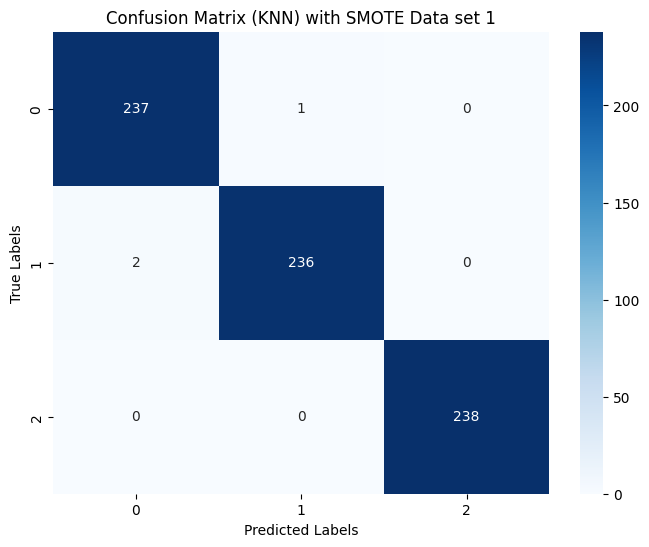

In [104]:

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance', metric='euclidean')  # You can adjust the number of neighbors
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

# Evaluate the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("KNN Classifier Metrics:")
print(f"Accuracy: {accuracy_knn}")
print(f"Precision: {precision_knn}")
print(f"Recall: {recall_knn}")
print(f"F1-score: {f1_knn}")
print(f"Confusion Matrix:\n{conf_matrix_knn}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_knn, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (KNN) with SMOTE Data set 1")
plt.show()

Accuracy: 0.9988116458704694
Precision: 0.9988116458704694
Recall: 0.9988116458704694
F1-score: 0.9988116458704694
Confusion Matrix:
[[1188    1    0]
 [   1  366    0]
 [   0    0  127]]


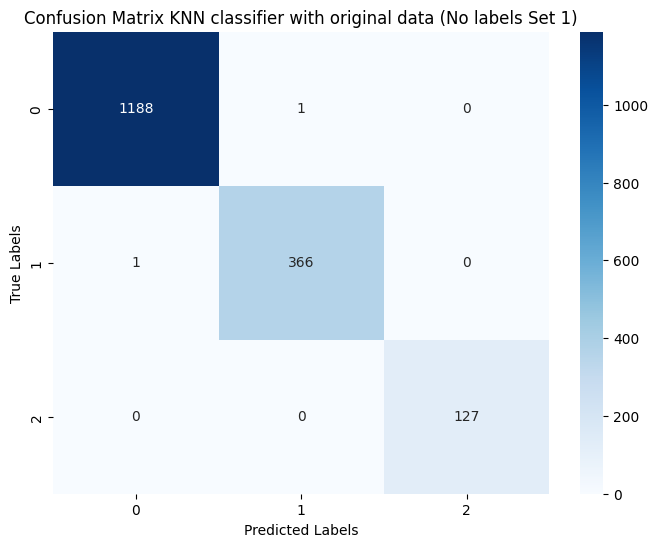

In [105]:
y_pred_train=knn.predict(x_train_valid_scaled)
accuracy = accuracy_score(y_train_valid, y_pred_train)
precision = precision_score(y_train_valid, y_pred_train, average='weighted') # Use 'weighted' for multi-class
recall = recall_score(y_train_valid, y_pred_train, average='weighted')
f1 = f1_score(y_train_valid, y_pred_train, average='weighted')
conf_matrix = confusion_matrix(y_train_valid, y_pred_train)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix KNN classifier with original data (No labels Set 1)")
plt.show()

Accuracy: 0.9721627408993576
Precision: 0.9721305715641259
Recall: 0.9721627408993576
F1-score: 0.9717066808084519
Confusion Matrix:
[[319   0   0]
 [  8 104   1]
 [  1   3  31]]


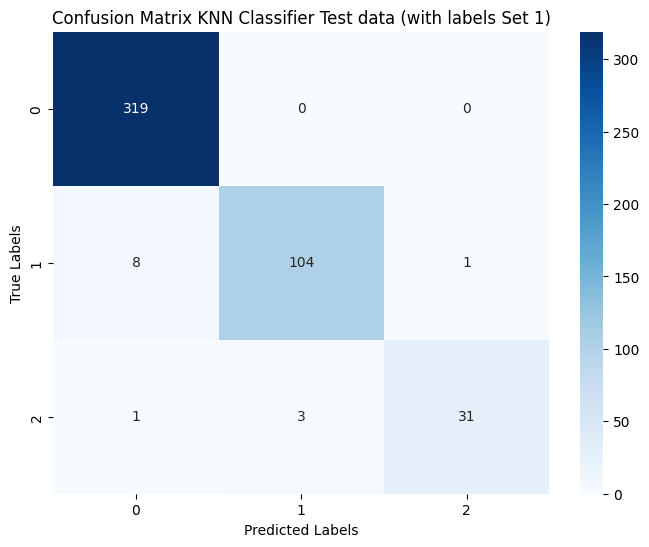

In [106]:
y_pred_test=knn.predict(x_test_valid_scaled)
accuracy = accuracy_score(y_test_valid, y_pred_test)
precision = precision_score(y_test_valid, y_pred_test, average='weighted') # Use 'weighted' for multi-class
recall = recall_score(y_test_valid, y_pred_test, average='weighted')
f1 = f1_score(y_test_valid, y_pred_test, average='weighted')
conf_matrix = confusion_matrix(y_test_valid, y_pred_test)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix KNN Classifier Test data (with labels Set 1)")
plt.show()

In [107]:
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 2, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [108]:
final_merged_KNN_set2=final_merged_LightGBM_set2

In [109]:
final_merged_KNN_set2

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,predicted_labels_lgbm
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [110]:
final_merged_KNN_set2=final_merged_KNN_set2.drop(columns=['predicted_labels_lgbm'])

In [111]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_df = pd.DataFrame({
    'y_pred_test': y_pred_test  # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_KNN_set2 = final_merged_KNN_set2.reset_index(drop=True)
y_pred_test_df=y_pred_test_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_KNN_set2 = pd.concat([final_merged_KNN_set2, y_pred_test_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_KNN_set2.head())


       Patient_ID  GALL_BLADDER_DISORDERS  CHOLESTEROL_DISORDERS  \
0  KHAIGHGPTTL318             182439716.4           1.094998e+09   
1  KHAIGHGPTTL319             910770303.8           1.731660e+09   
2  KHAIGHGPTTL321             364464779.5           1.732531e+09   
3  KHAIGHGPTTL348             364372662.3           1.123409e+09   
4  KHAIGHGPTTL350             577026940.4           1.366654e+09   

        OBESITY Gall bladder disorders  new_labels  y_pred_test  
0  1.824242e+08                      0           0            0  
1  2.305030e+05                      0           0            0  
2  4.723112e+08            Low to Mild           0            0  
3  4.436289e+08                      -           0            0  
4  5.916564e+07                      0           0            0  


In [112]:
final_merged_KNN_set2

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,y_pred_test
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [113]:
final_merged_KNN_set2.tail(60)

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,y_pred_test
407,KHSCQTGPTTL108,9.414454e+08,2.520964e+09,4.132915e+08,0,2,1
408,KHSCQTGPTTL109,5.466281e+08,1.520153e+09,1.824703e+08,-,0,0
409,KHSCQTGPTTL110,3.686367e+05,1.153946e+09,2.009904e+08,0,0,0
410,KHSCQTGPTTL44,3.646492e+08,8.200419e+08,1.823399e+08,0,0,0
411,KHSCQTGPTTL45,3.644649e+08,1.335925e+09,4.224768e+05,0,1,0
412,KHSCQTGPTTL46,2.125622e+08,0.000000e+00,1.822323e+08,0,1,1
413,KHSCQTGPTTL47,9.220119e+04,1.094829e+09,6.146746e+04,-,0,0
414,KHSCQTGPTTL49,1.821633e+08,9.107700e+08,2.008061e+08,0,0,0
415,KHSCQTGPTTL50,3.644647e+08,2.049525e+09,8.199803e+08,0,1,1
416,KHSCQTGPTTL51,7.289293e+08,2.338084e+09,4.134987e+08,-,2,2


In [114]:
final_merged_KNN_set2.to_csv('/content/drive/MyDrive/GALL BLADDERS/final_merged_KNN_set2.csv', index=False)


In [115]:
final_merged_KNN_set2

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,y_pred_test
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


# EXTRA TREES

In [116]:
df_test = df[df['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [117]:
labels=pd.read_csv('/content/drive/MyDrive/GALL BLADDERS/new_labels_gall_bladders_set2.csv')

In [118]:
labels

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08,0,2
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08,0,0
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08,0,0
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08,0,0
...,...,...,...,...,...,...
2145,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1
2146,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04,0,0
2147,KHYUNQGPTTL11,2.304190e+05,1.034231e+09,0.000000e+00,0,0
2148,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [119]:
df_train = labels[~labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)


In [120]:
df_train

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL155,1.093394e+09,1.549463e+09,2.130295e+08,0,2
1,KHAIGHGPTTL156,5.465359e+08,2.837003e+09,2.128695e+08,0,2
2,KHAIGHGPTTL157,7.287913e+08,1.792181e+09,1.823782e+08,0,0
3,KHAIGHGPTTL158,3.646029e+08,1.276290e+09,2.008906e+08,0,0
4,KHAIGHGPTTL159,5.465819e+08,1.306413e+09,6.074028e+08,0,0
...,...,...,...,...,...,...
1678,KHTENTGPTTL14,3.645107e+08,1.124426e+09,6.560451e+08,0,0
1679,KHTENTGPTTL16,5.770269e+08,1.549481e+09,3.643495e+08,0,0
1680,KHYUNQGPTTL10,3.647641e+08,1.154046e+09,4.610059e+04,0,0
1681,KHAIGPRX1340,0.000000e+00,0.000000e+00,5.378402e+04,0,1


In [121]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07
...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08


In [122]:
df_train_set2=df_train.copy()
df_train_set2=df_train_set2.drop(columns=['Patient_ID','Gall bladder disorders'])

In [123]:
scaler=MinMaxScaler()
smote=SMOTE()
test_split=0.2

In [124]:
X = df_train_set2.drop(columns=['new_labels'])
y = df_train_set2['new_labels']
X_balanced, y_balanced = smote.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(
    X_balanced, y_balanced, test_size=test_split, random_state=42, stratify=y_balanced
)
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [125]:
x_train_valid=df_train_set2.drop(columns=['new_labels'])
y_train_valid=df_train_set2['new_labels']
x_train_valid_scaled=scaler.transform(x_train_valid)
x_train_valid_scaled=pd.DataFrame(x_train_valid_scaled,columns=x_train_valid.columns,index=x_train_valid.index)

In [126]:
df_test=labels[labels['Patient_ID'].isin(df2['Patient_ID'])].reset_index(drop=True)

In [127]:
df_test

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0
...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1


In [128]:
df_test=df_test.drop(columns=['Patient_ID','Gall bladder disorders'])

In [129]:
x_test_valid=df_test.drop(columns=['new_labels'])
y_test_valid=df_test['new_labels']
x_test_valid_scaled=scaler.transform(x_test_valid)
x_test_valid_scaled=pd.DataFrame(x_test_valid_scaled,columns=x_test_valid.columns,index=x_test_valid.index)


In [130]:
y_test.value_counts()

,count
new_labels,
2,238
0,238
1,238


Extra Trees Classifier Metrics:
Accuracy: 0.9957983193277311
Precision: 0.9958041299601599
Recall: 0.9957983193277311
F1-score: 0.9957983007834051
Confusion Matrix:
[[236   2   0]
 [  1 237   0]
 [  0   0 238]]


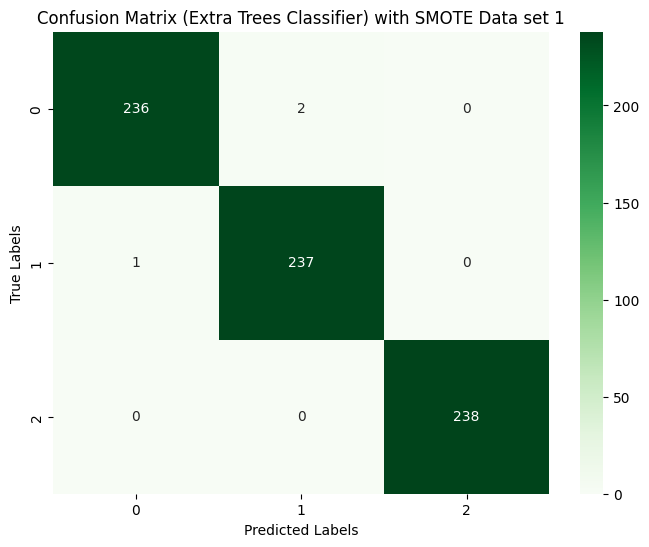

In [131]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Extra Trees Classifier
et_classifier = ExtraTreesClassifier(
    n_estimators=200,
    max_depth=30,
    min_samples_split=2,
    random_state=42
)
et_classifier.fit(X_train_scaled, y_train)
y_pred_et = et_classifier.predict(X_test_scaled)

# Evaluate the Extra Trees model
accuracy_et = accuracy_score(y_test, y_pred_et)
precision_et = precision_score(y_test, y_pred_et, average='weighted')
recall_et = recall_score(y_test, y_pred_et, average='weighted')
f1_et = f1_score(y_test, y_pred_et, average='weighted')
conf_matrix_et = confusion_matrix(y_test, y_pred_et)

# Print the evaluation metrics
print("Extra Trees Classifier Metrics:")
print(f"Accuracy: {accuracy_et}")
print(f"Precision: {precision_et}")
print(f"Recall: {recall_et}")
print(f"F1-score: {f1_et}")
print(f"Confusion Matrix:\n{conf_matrix_et}")

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Greens",
            xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Extra Trees Classifier) with SMOTE Data set 1")
plt.show()


Accuracy (Extra Trees): 0.9982174688057041
Precision (Extra Trees): 0.9982201978798377
Recall (Extra Trees): 0.9982174688057041
F1-score (Extra Trees): 0.9982183064579844
Confusion Matrix (Extra Trees):
[[1187    2    0]
 [   1  366    0]
 [   0    0  127]]


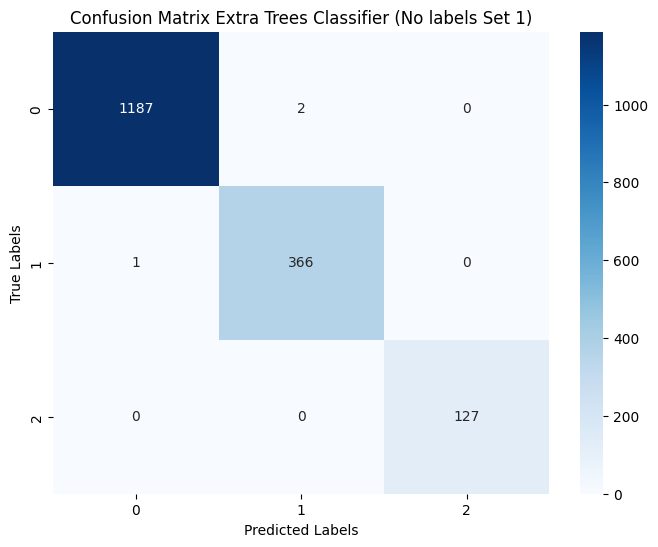

In [132]:
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# import seaborn as sns
# import matplotlib.pyplot as plt
# import numpy as np

# # Initialize Extra Trees Classifier
# et_classifier = ExtraTreesClassifier(
#     n_estimators=200,
#     max_depth=30,
#     min_samples_split=2,
#     random_state=42
# )

# # Fit the model on training data
# et_classifier.fit(x_train_valid_scaled, y_train_valid)

# Predict on training data
y_pred_train_et = et_classifier.predict(x_train_valid_scaled)

# Evaluate the model
accuracy_et = accuracy_score(y_train_valid, y_pred_train_et)
precision_et = precision_score(y_train_valid, y_pred_train_et, average='weighted')  # Use 'weighted' for multi-class
recall_et = recall_score(y_train_valid, y_pred_train_et, average='weighted')
f1_et = f1_score(y_train_valid, y_pred_train_et, average='weighted')
conf_matrix_et = confusion_matrix(y_train_valid, y_pred_train_et)

# Print metrics
print(f"Accuracy (Extra Trees): {accuracy_et}")
print(f"Precision (Extra Trees): {precision_et}")
print(f"Recall (Extra Trees): {recall_et}")
print(f"F1-score (Extra Trees): {f1_et}")
print(f"Confusion Matrix (Extra Trees):\n{conf_matrix_et}")

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_train_valid), yticklabels=np.unique(y_train_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Extra Trees Classifier (No labels Set 1)")
plt.show()


Accuracy (Extra Trees Test): 0.9635974304068522
Precision (Extra Trees Test): 0.9638630064425181
Recall (Extra Trees Test): 0.9635974304068522
F1-score (Extra Trees Test): 0.9628425902319954
Confusion Matrix (Extra Trees Test):
[[319   0   0]
 [ 12 100   1]
 [  1   3  31]]


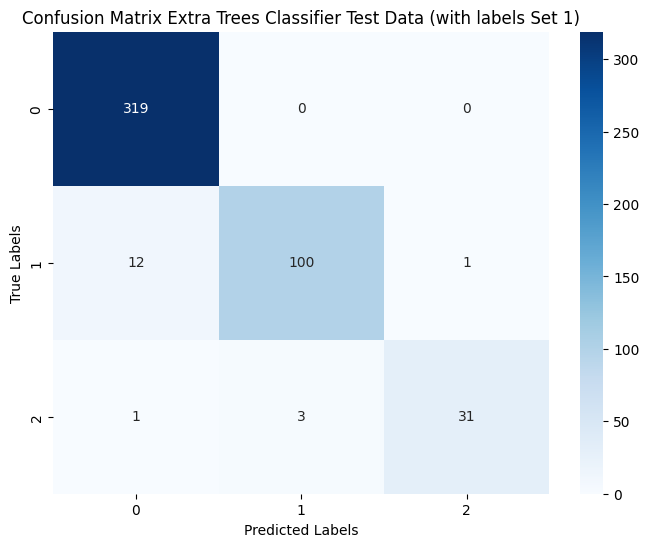

In [133]:
# Predict on test data
y_pred_test_et = et_classifier.predict(x_test_valid_scaled)

# Evaluate the model on test data
accuracy_et_test = accuracy_score(y_test_valid, y_pred_test_et)
precision_et_test = precision_score(y_test_valid, y_pred_test_et, average='weighted')  # Use 'weighted' for multi-class
recall_et_test = recall_score(y_test_valid, y_pred_test_et, average='weighted')
f1_et_test = f1_score(y_test_valid, y_pred_test_et, average='weighted')
conf_matrix_et_test = confusion_matrix(y_test_valid, y_pred_test_et)

# Print metrics
print(f"Accuracy (Extra Trees Test): {accuracy_et_test}")
print(f"Precision (Extra Trees Test): {precision_et_test}")
print(f"Recall (Extra Trees Test): {recall_et_test}")
print(f"F1-score (Extra Trees Test): {f1_et_test}")
print(f"Confusion Matrix (Extra Trees Test):\n{conf_matrix_et_test}")

# Plot confusion matrix for test data
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_et_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test_valid), yticklabels=np.unique(y_test_valid))
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Extra Trees Classifier Test Data (with labels Set 1)")
plt.show()


In [134]:
y_pred_test_et

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2,
       2, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 2, 0, 0,
       0, 0, 0, 1, 2, 1, 1, 1, 0, 1, 0, 2, 0, 0, 1, 0, 1, 2, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 2, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,

In [135]:
final_merged_ET_set2=final_merged_LightGBM_set2

In [136]:
final_merged_ET_set2

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,predicted_labels_lgbm
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
...,...,...,...,...,...,...,...
462,KHSSRIGPTTL8,1.822094e+08,1.519861e+09,2.995419e+05,0,0,0
463,KHSSRIGPTTL9,1.822094e+08,1.063667e+09,3.948790e+08,0,0,0
464,KHTENTGPTTL15,1.383018e+05,8.504483e+08,1.824397e+08,-,0,0
465,KHTRCLGPTTL52,5.467200e+08,2.248475e+09,2.129232e+08,0,1,1


In [137]:
final_merged_ET_set2=final_merged_ET_set2.drop(columns=['predicted_labels_lgbm'])

In [138]:
import pandas as pd

# Convert y_pred_test_lgbm (array) into a DataFrame
# Assuming 'patient_id' exists in final_merged_LightGBM_set1 for proper alignment
y_pred_test_et_df = pd.DataFrame({
    'y_pred_test_et': y_pred_test_et  # Array of predictions
})

# Merge the predictions DataFrame with final_merged_LightGBM_set1
# If no specific key like 'patient_id' is required for the merge, use reset_index for alignment
final_merged_ET_set2 = final_merged_ET_set2.reset_index(drop=True)
y_pred_test_et_df=y_pred_test_et_df.reset_index(drop=True)

# Concatenate the predictions with the original DataFrame
final_merged_ET_set2 = pd.concat([final_merged_ET_set2, y_pred_test_et_df], axis=1)

# Display the first few rows of the updated DataFrame
print(final_merged_ET_set2.head())


       Patient_ID  GALL_BLADDER_DISORDERS  CHOLESTEROL_DISORDERS  \
0  KHAIGHGPTTL318             182439716.4           1.094998e+09   
1  KHAIGHGPTTL319             910770303.8           1.731660e+09   
2  KHAIGHGPTTL321             364464779.5           1.732531e+09   
3  KHAIGHGPTTL348             364372662.3           1.123409e+09   
4  KHAIGHGPTTL350             577026940.4           1.366654e+09   

        OBESITY Gall bladder disorders  new_labels  y_pred_test_et  
0  1.824242e+08                      0           0               0  
1  2.305030e+05                      0           0               0  
2  4.723112e+08            Low to Mild           0               0  
3  4.436289e+08                      -           0               0  
4  5.916564e+07                      0           0               0  


In [139]:
final_merged_ET_set2.head(60)

,Patient_ID,GALL_BLADDER_DISORDERS,CHOLESTEROL_DISORDERS,OBESITY,Gall bladder disorders,new_labels,y_pred_test_et
0,KHAIGHGPTTL318,1.824397e+08,1.094998e+09,1.824242e+08,0,0,0
1,KHAIGHGPTTL319,9.107703e+08,1.731660e+09,2.305030e+05,0,0,0
2,KHAIGHGPTTL321,3.644648e+08,1.732531e+09,4.723112e+08,Low to Mild,0,0
3,KHAIGHGPTTL348,3.643727e+08,1.123409e+09,4.436289e+08,-,0,0
4,KHAIGHGPTTL350,5.770269e+08,1.366654e+09,5.916564e+07,0,0,0
5,KHAIGHGPTTL352,3.646952e+08,1.548649e+09,6.425613e+05,-,0,0
6,KHAIGHGPTTL354,3.830000e+08,1.549581e+09,2.126082e+08,-,0,0
7,KHAIGHGPTTL355,9.220119e+04,6.680700e+08,6.146746e+04,-,0,0
8,KHAIGHGPTTL356,1.823015e+08,1.277008e+09,1.822861e+08,-,0,0
9,KHAIGHGPTTL359,1.825318e+08,7.290060e+08,2.125852e+08,-,0,0


In [ ]:
final_merged_ET_set2.to_csv('/content/drive/MyDrive/gall/final_merged_ET_set2.csv', index=False)
